Bu derste şeker hastalığına ait bir veri seti üzerinde çalışarak bir kişinin şeker hastası olmaya ne kadar yakın olduğunu anlamaya çalışacağız. Veri setini [şu adresten](https://www.kaggle.com/uciml/pima-indians-diabetes-database) indirebilirsiniz. 

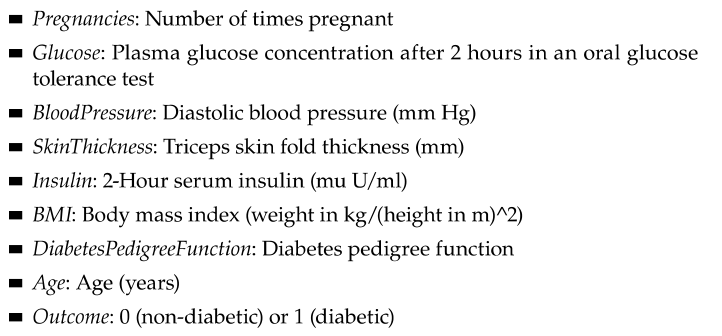

In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Veri setinde 768 satır var ve 9 özellik var.

In [4]:
# veri setinde eksik veri var mı
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Eksik veri yok.

In [8]:
# Sıfır değerini içeren verilere bakalım. 
# Hamile kalma sayısı ile çıktı değişkeninin 0 olması normal bir durum. 
# Ancak diğer özelliklerde 0 olması o özelliğin ölçülmediği anlamına gelir.
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
# Bu nedenle 0 değerlerinin nan olarak girilmesi gereklidir.
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [15]:
# Eksik verileri ortalama ile dolduralım.
df.fillna(df.mean(),inplace=True)

In [16]:
# Şimdi 0 olan değerleri görelim.
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [17]:
# Korelasyon analizi
# Çıktı değişkenine hangi özelliklerin etki ettiğini korelasyon ile görebiliriz.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [18]:
# Korelasyon grafiği
import seaborn as sns

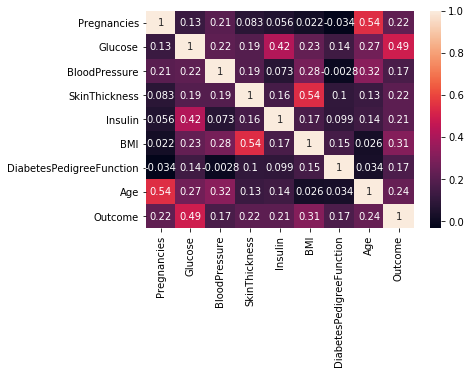

In [19]:
sns.heatmap(df.corr(), annot=True)

In [20]:
# en yüksek korelasyona sahip 4 özellik
df.corr().nlargest(4,'Outcome').index

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')

In [21]:
# Burada outcome değişkenine en fazla korelasyona sahip 'Glucose', 'BMI', 'Age' özellikleri ile
# analize devam edelim.

algoritmalar
1. Logistic
2. SVM

In [24]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
X = df[['Glucose','BMI','Age']]
y=df.iloc[:,8]

In [25]:
log_reg = linear_model.LogisticRegression()
log_reg_score = cross_val_score(log_reg,X,y,cv=10,scoring='accuracy').mean()

In [26]:
log_reg_score

0.7669856459330144

In [27]:
result=[]
result.append(log_reg_score)

In [28]:
from sklearn import svm


In [29]:
linear_svm = svm.SVC(kernel='linear')

In [30]:
linear_svm_score = cross_val_score(linear_svm,X,y,cv=10,scoring='accuracy').mean()

In [31]:
linear_svm_score

0.7656527682843473

In [32]:
# modelin kaydedilmesi
import pickle

In [33]:
filename='diabets.sav'

In [37]:
log_reg.fit(X,y)

pickle.dump(log_reg,open(filename,'wb'))



In [38]:
# load model
loaded_model = pickle.load(open(filename,'rb'))

In [41]:
# prediction
Glucose = 55
BMI = 60
Age = 20
prediction = loaded_model.predict([[Glucose,BMI,Age]])

In [42]:
prediction

array([0], dtype=int64)